---
# <div align="center"><font color='green'> COSC 2673/2793 |  Machine Learning | Assignment 2 </font></div>
## <div align="center"> <font color='black'> Student Name: Chee Kin Go, Vincent Bethlehem </font></div>
## <div align="center"> <font color='red'> Student number: s3955624, s3899816 </font></div>
---

In [1]:
# To ensure Jupyter Notebook width size is same as your device viewport
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Problem statement

As a team of machine learning engineers at a biomedical startup, the goal is to build two separate classification model in analyzing histopathology images of colon cells:
- isCancerous Classification: Binary classification to determine whether a cell represents cancerous cells
- Cell-Type Classification: Multi-class classification to identify cell types (fibroblast, inflammatory, epithelial, or others)

Various classification models are implemented and evaluated:
- isCancerous Classification:
    - Baseline:
        - Logistic Regression
    - Advanced:

- Cell-Type Classification:
     - Baseline:
         - Regularised Logistic Regression Model with Feature Selection
     - Advanced:

By the end of evaluation, We aim to select the best-performing model for each classification method with justification

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis is the essential first step in the machine learning project which we perform initial investigations on data to:
 - Develop comprehensive understanding of dataset;
 - Reveal hidden patterns and feature relationship;
 - Spot outliers that might skew model performance;

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Unlimited width
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to multiple lines

# read csv file
mainColonCellFrame = pd.read_csv('data_labels_mainData.csv', delimiter=',')

# print head
print(mainColonCellFrame.columns)

# print head
mainColonCellFrame.head()


Index(['InstanceID', 'patientID', 'ImageName', 'cellTypeName', 'cellType',
       'isCancerous'],
      dtype='object')


InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0       22405          1  22405.png   fibroblast         0            0
1       22406          1  22406.png   fibroblast         0            0
2       22407          1  22407.png   fibroblast         0            0
3       22408          1  22408.png   fibroblast         0            0
4       22409          1  22409.png   fibroblast         0            0

#### Data Loading
The data is loaded and abbreviated column names:
- **InstanceID**: Unique identifier for each individual cell instance
- **patientID**: Unique identifier for each patient. Multiple cells may come from the same patient 
- **ImageName**: Filename of the image of the cell 
- **cellTypeName**: Descriptive name of the cell type (epithelial, lymphocyte, fibroblast and others) 
- **cellType**: Numeric code representing the cell type
- **isCancerous**: Binary indicator of Non-cancerous (0) and Cancerous (1) cell

<font color='green'> The target column is **isCancerous** and **cellType**.</font>
All the other columns are attributes.

In [3]:
# check for missing value
print("\nMissing values:")
print(pd.isna(mainColonCellFrame).sum())


Missing values:
InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64



#### No Missing Values
- No missing values found in the dataset

In [4]:
# display dataframe statistics
print("\nDataframe statistics:")
print(mainColonCellFrame.describe())


Dataframe statistics:
         InstanceID    patientID     cellType  isCancerous
count   9896.000000  9896.000000  9896.000000  9896.000000
mean   10193.880154    29.762025     1.501516     0.412187
std     6652.912660    17.486553     0.954867     0.492253
min        1.000000     1.000000     0.000000     0.000000
25%     4135.750000    14.000000     1.000000     0.000000
50%     9279.500000    26.000000     2.000000     0.000000
75%    16821.250000    47.000000     2.000000     1.000000
max    22444.000000    60.000000     3.000000     1.000000


#### Dataframe Statistics
Classification of Variables in the Dataset as obtained from the statistical summary above:
- Categorical Variables
    - Nominal Categorical Variables: cellType, cellTypeName, isCancerous

- Numerical Variables
    - Discrete Numerical Variables: InstanceID, patientID



Distribution for each variable:


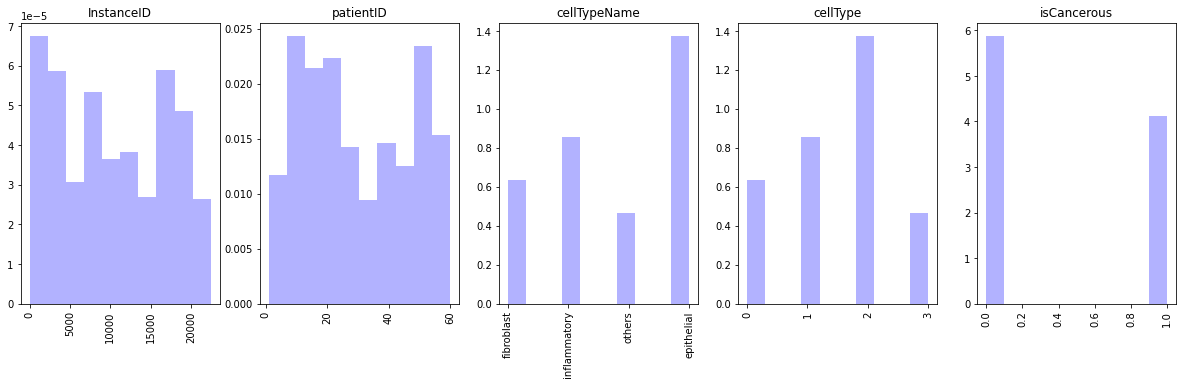

In [5]:
#Distirbution for each variable
print("\nDistribution for each variable:")
plt.figure(figsize=(25,30))
#didnt do image name because its not relevant
for i, col in enumerate([c for c in mainColonCellFrame.columns if c != 'ImageName']):
    plt.subplot(5, 6, i + 1)
    plt.hist(mainColonCellFrame[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.show()

#### Historgram Plot for Distribution Pattern for all variables
Reason:
- visualise data distirbution - shape, spread and central tendency to see if its normal, multimodal, or skewed.
- check the mean, mode and median using the overall shape
- check for outlier if there is unusual frequency in the ranges

Observation from Histogram Plot:
- InstanceID and PatientID are identifiers so dont really show any meaningful information
- CellTypeName and celltype both indicate that the epithelial cell is the most common compared to the others. This shows that the distribution of the cells aren't balanced
- isCancerous is a binary variable (0 for non-cancerous and 1 for cancerous). The histogram shows that there are more non-cancerous instances present
- There are no significant outliers present in the any of the histograms


Correlation Matrix between variables:


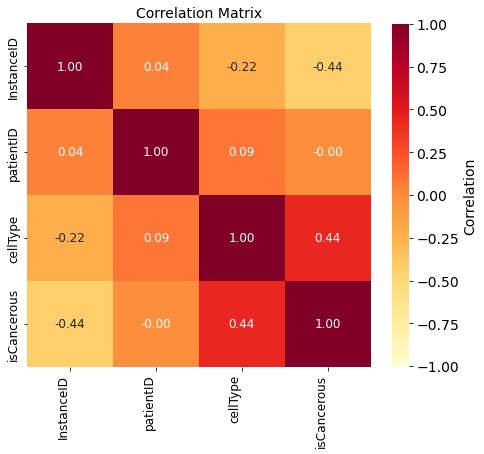

In [6]:
# Correlation Matrix between variables
print("\nCorrelation Matrix between variables:")
f, ax = plt.subplots(figsize=(7, 7))
corr = mainColonCellFrame.corr()

# Increase font sizes
plt.rcParams.update({'font.size': 14})  # Base font size
cbar_kws = {"shrink": 0.8, "label": "Correlation"}

# Create the heatmap with annotations and a famous color palette
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap="YlOrRd",  # Use the yellow-orange-red palette
    square=True,
    annot=True,  # This will print the values on the heatmap
    fmt=".2f",   # Format the annotations to 2 decimal places
    annot_kws={"size": 12}, 
    cbar_kws=cbar_kws
)

# Rotate x-axis labels for better readability
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontsize=12
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=12 
)

# Increase title font size
plt.title("Correlation Matrix", fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for bigger fonts
plt.show()

#### Correlation Matrix between isCancerous and other variables
Reason:
- visualise how different variables relate with each other with its strength and direction (positive/negative)
- to spot multicollinearity by identifying extremely high correlations between predictors

Observations:
- Strong Predictors (|r| > 0.5):
    - None

- Moderate Predictors (0.3 < |r| < 0.5):
    - cellType: (0.44) (positive correlation)
    - instanceID: (-0.44) (negative correlation)

- Weak Predictors (|r| < 0.3):
    - patientID: (0.00) (no correlation)

<font color='red'>No presence of multicollinearity in the dataset</font>


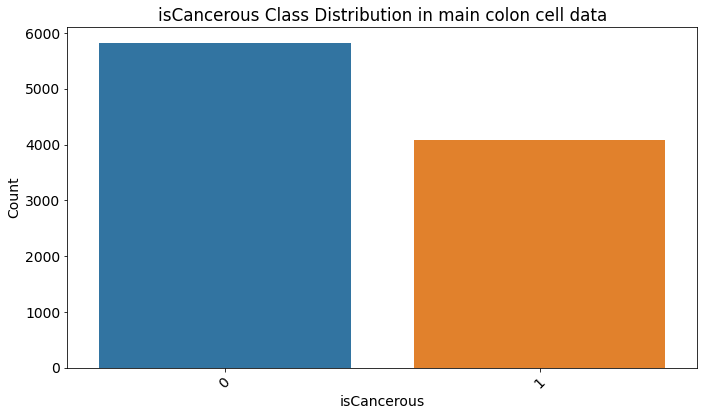

In [7]:
# isCancerous class distribution
plt.figure(figsize=(10,6))
sns.countplot(data=mainColonCellFrame, x='isCancerous', order=mainColonCellFrame['isCancerous'].value_counts().index)
plt.title('isCancerous Class Distribution in main colon cell data')
plt.xlabel('isCancerous')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate if class names are long
plt.tight_layout()
plt.show()

#### isCancerous Class Distribution Plot
Reason:
- identify whether the dataset is balanced or imbalanced
- determine whether data resampling, or data augmentation is needed to address biases

Observations:
- Moderate level of class imblance present with approx 5800 non-cancerous instances, and approx 4,100 cancerous instances (ratio is 58:42)
- cancerous instance has a considerable portion in dataset, so classification methods can still work well with carefully selected evalutaiton metrics=


Relationship between isCancerous and other variables:


<Figure size 2160x3600 with 0 Axes>

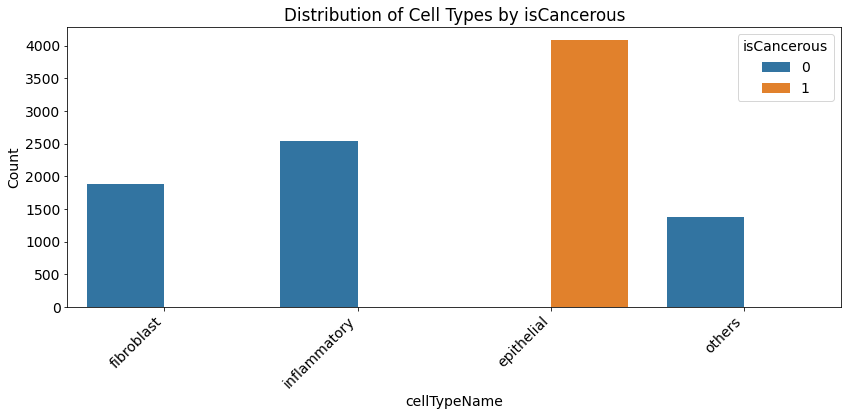

In [8]:
# Relationship between isCancerous and other variables
print("\nRelationship between isCancerous and other variables:")
plt.figure(figsize=(30,50))

# Create a mapping from cellTypeName to cellType
cell_type_mapping = mainColonCellFrame[['cellTypeName', 'cellType']].drop_duplicates().set_index('cellTypeName')['cellType']

# Sort cell types by their numeric cellType value
ordered_cell_types = cell_type_mapping.sort_values().index.tolist()

# Count plot for Distribution of Cell Types by isCancerous with explicit order
plt.figure(figsize=(12, 6))
sns.countplot(data=mainColonCellFrame, x='cellTypeName', hue='isCancerous', order=ordered_cell_types)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Cell Types by isCancerous')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Bar Chart for Distirbution for each Cell Type by isCancerous
Reason:
- Visualise which cell types are associated with cancerous status to be identified as potential predictive indicators which helps understand biological aspects of classification problem.

Observations:
- Cancer is only labeled in epithelial cells because all cancerous cells (100%) only present in epithelial cells (approx 4000 instances). 
- Non-cancerous cells are distributed among fibroblast (approx 1900), inflammatory (approx 2500) and "others" cells (approx 1400). No epithelial cells are labeled as non-cancerous.

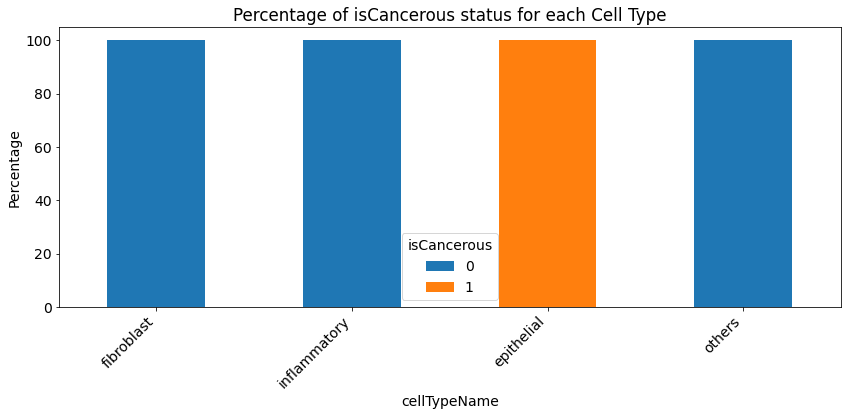

In [9]:
# Stacked bar chart with the same order
bar_chart_iscancerous_by_cell_type = pd.crosstab(
    mainColonCellFrame['cellTypeName'], 
    mainColonCellFrame['isCancerous'], 
    normalize='index'
).mul(100)

# Reindex the DataFrame to match the order based on cellType numeric value
bar_chart_iscancerous_by_cell_type = bar_chart_iscancerous_by_cell_type.reindex(ordered_cell_types)

bar_chart_iscancerous_by_cell_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of isCancerous status for each Cell Type')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


#### Bar Chart for Percentage of isCancerous status for each Cell Type
Reason:
- Show the proportion of the isCancerous status distribution for each cell type regardless of its absolute counts

Observations:
- Confirms that 100% of epithelial cell are cancerous, and 100% of other cells are non-cancerous.
- Represents that there's a strong predictive relationship between cell type and isCancerous where identifying whether a cell is epithelial or not is enough to determine its cancerous status. Cell type could be used as criteria for classfication model.


Scatter plot between InstanceID and isCancerous for each Cell Type:


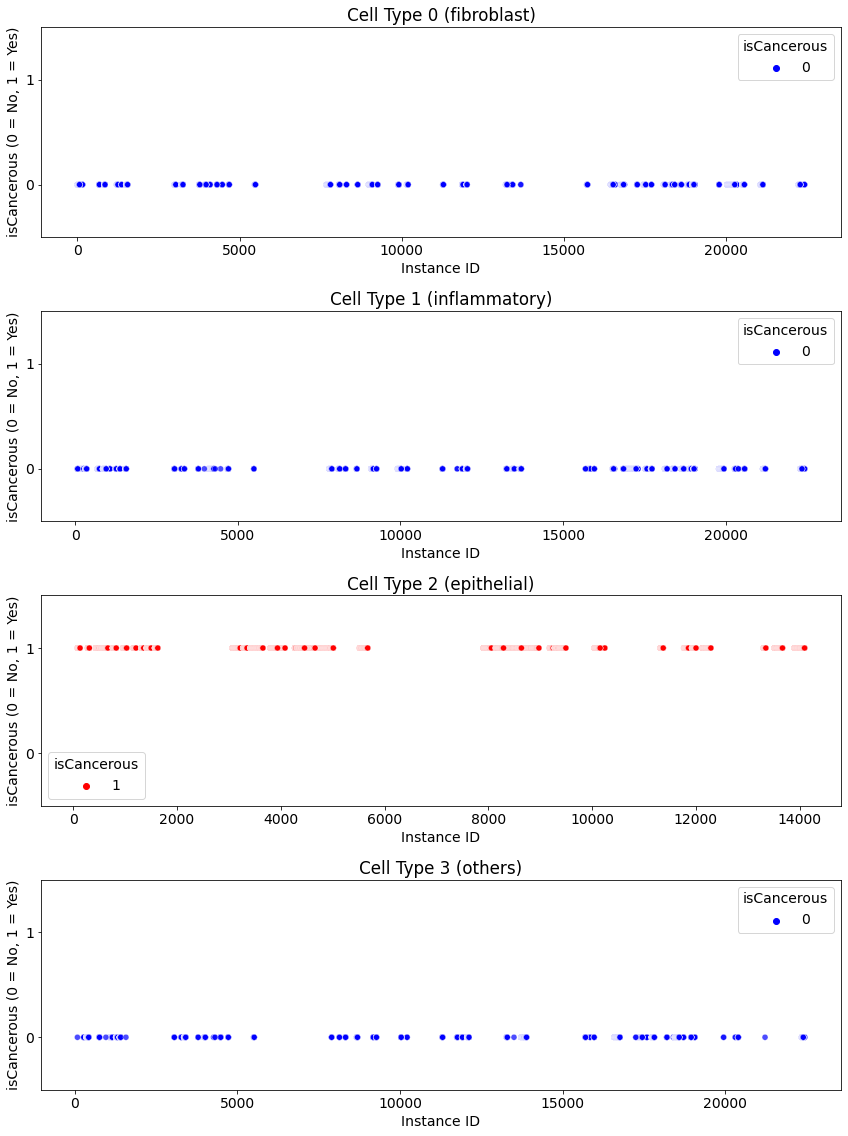

In [10]:
# Scatter plot between each cell type, PatientID and isCancerous
# Get unique cell types
mainColonCellFrame_unique_cell_types = mainColonCellFrame['cellType'].unique()

# Create a subplot for each cell type
fig, axes = plt.subplots(len(mainColonCellFrame_unique_cell_types), 1, figsize=(12, 4*len(mainColonCellFrame_unique_cell_types)))

# If there's only one cell type, axes won't be an array, so convert it to one
if len(mainColonCellFrame_unique_cell_types) == 1:
    axes = [axes]

# Create a scatter plot for each cell type
print("\nScatter plot between InstanceID and isCancerous for each Cell Type:")
for i, cell_type in enumerate(sorted(mainColonCellFrame_unique_cell_types)):
    # Filter data for current cell type
    cell_data = mainColonCellFrame[mainColonCellFrame['cellType'] == cell_type]
    
    # Get the cell type name for the title
    cell_type_name = cell_data['cellTypeName'].iloc[0] if not cell_data.empty else f"Type {cell_type}"
    
    
    # Create scatter plot
    sns.scatterplot(
        data=cell_data, 
        x='InstanceID', 
        y='isCancerous',
        hue='isCancerous', 
        palette={0: 'blue', 1: 'red'}, 
        alpha=0.7,
        ax=axes[i]
    )
    
    # Set title and labels
    axes[i].set_title(f'Cell Type {cell_type} ({cell_type_name})')
    axes[i].set_xlabel('Instance ID')
    axes[i].set_ylabel('isCancerous (0 = No, 1 = Yes)')
    
    # Set y-axis to show only 0 and 1
    axes[i].set_yticks([0, 1])
    axes[i].set_ylim(-0.5, 1.5)
    
plt.tight_layout()
plt.show()

#### Scatter plot between InstanceID and isCancerous for each Cell Type
Reason:
- Idenitfy pattern between distribution of instance identificatioin and isCancerous status for each cell type

Observations:
- Confirm previous obvservation where only epithelial cells are cancerous while others are non-cancerous
- Support previous asumption where there is predictive relationship between cell type and cancer status
- For non-epithelial cells, instanceID ranges from 0 to above 20000, while epithelial cells only until 14000. This suggests epithelial cells were collected differently or earlier during sample collection. 
- Clustering of instanceID present across all cell types, suggest batch collection of sample collection. Cluster are seen in 0 to 20000, 5000, 10000, and between 15000 to 20000


Pairplot matrix between all variables with isCancerous hue:


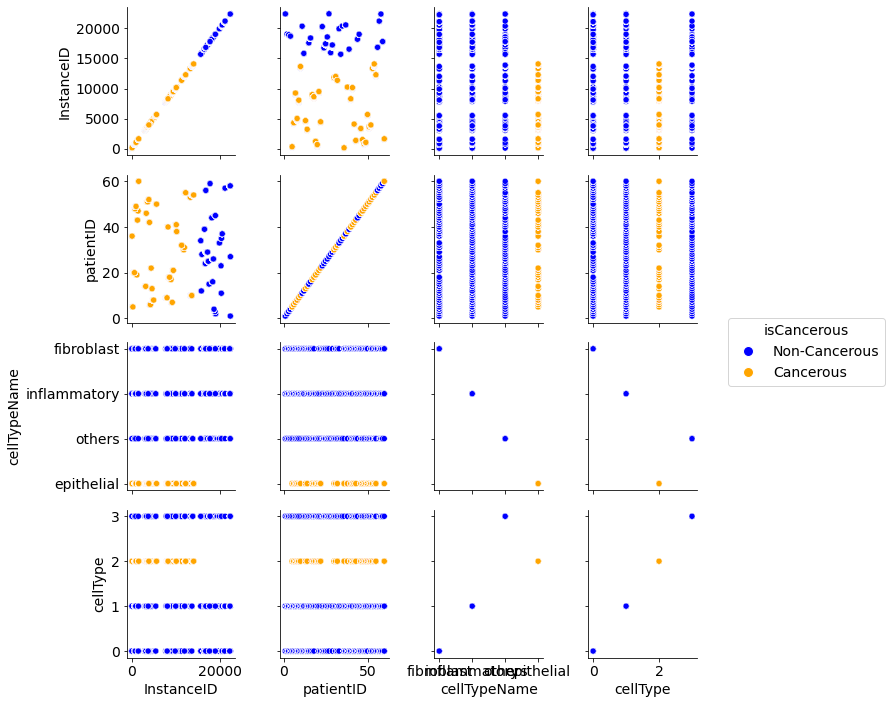

In [11]:
# Create a Pair plot for each variable with target variable hue (isCancerous)
print("\nPairplot matrix between all variables with isCancerous hue:")
isCancerous_pair_plot = sns.PairGrid(
    mainColonCellFrame, 
    vars=['InstanceID', 'patientID', 'cellTypeName', 'cellType'], 
    hue="isCancerous",
    palette={0: 'blue', 1: 'orange'}
)
isCancerous_pair_plot.map(sns.scatterplot)

# Remove auto-generated legends
for ax in isCancerous_pair_plot.axes.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Add legend
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10)
]
isCancerous_pair_plot.fig.legend(
    custom_lines, 
    ["Non-Cancerous", "Cancerous"], 
    title="isCancerous",
    loc='center right',
    bbox_to_anchor=(1.25, 0.5)
)

plt.tight_layout()
plt.show()

#### Pairplot matrix between all variables with isCancerous hue:
Reason:
- visualise relationships between multiple variables simultaneously with cancer status as hue. Allow pattern to be identified that is not viewable in bivariate plots.
- check if non-linear or linear boundary can separate the two isCancerous classes

Observations:
- in patientID vs instanceID, and plots invloving cellType and cellTypeName, linear decision boundary can clearly separate the two classes
- None of the plot suggest non-linear decision boundary for class separation
- isCancerous clustering present in patientID where certain pateint has more cancerous samples, while other have more non-cancerous samples. This suggest there's biasness in patient selection when creating dataset.
- CellTypeName and CellType are highly correlated. cell type 2 corresponds to epithelial, while 0, 1, and 3 correspond to fibroblast, inflammatory, and other cells. This means feature removal can be performed as there is redundant feature.



Pairplot matrix between all variables with cellType hue:


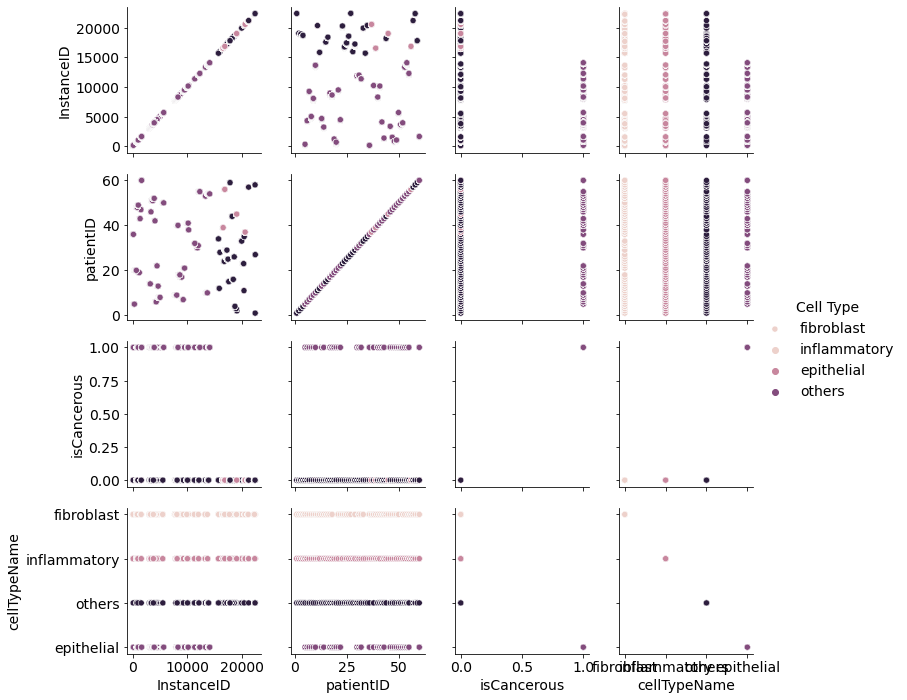

In [12]:
# Create a Pair plot for each variable with target variable hue (cellType)
print("\nPairplot matrix between all variables with cellType hue:")
cellType_pair_plot = sns.PairGrid(mainColonCellFrame, vars=['InstanceID','patientID', 'isCancerous', 'cellTypeName'], hue="cellType")
cellType_pair_plot.map(sns.scatterplot)

# Get unique cell type names for the legend
cell_type_labels = {
    cell_type: name 
    for cell_type, name in zip(
        mainColonCellFrame['cellType'].unique(),
        mainColonCellFrame.drop_duplicates(subset=['cellType'])['cellTypeName']
    )
}
# Sort by cell type value
sorted_labels = [cell_type_labels[i] for i in sorted(cell_type_labels.keys())]

cellType_pair_plot.add_legend(title="Cell Type", labels=sorted_labels)
plt.show()

#### Pairplot matrix between all variables with cellType hue:
Reason:
- visualise relationships between variables and help detect any potential patterns, clusters or seperates based on CellType hue. This can help us identify if InstanceID, PatientID and isCancerous have any distinct behaviours surounding them that are noteworthy.
Observations:
- CellTypeName has clustering and should be ignored especially since it is categorical
- isCancerous show no sign of seperate by CellType meaning that if its cancerous its going to be spread across the different cell types
- InstanceId and PatientID are identifier variables (not very important)
- There is no real obvious linear relationship between the variables. This means there is very low correlation
- The colour hue differentiates the four different cell types quite well, but there isnt really distinct grouping that can be seen between these variables that can help seperate the cell types based on this.


Sample image for each cell type:


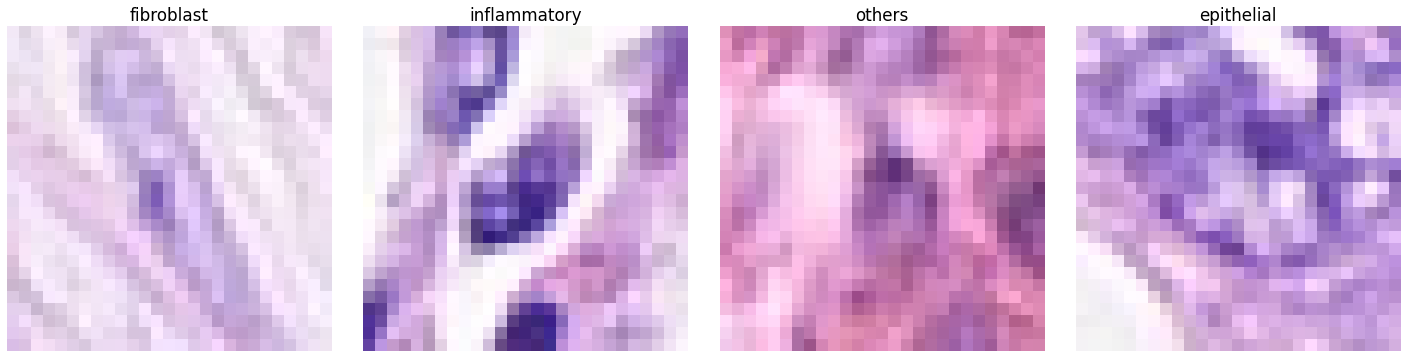

In [13]:
print("\nSample image for each cell type:")
# unique cell type labels
mainColonCellFrame_cell_types = mainColonCellFrame['cellTypeName'].unique()
example_images = {}

# Choose random image
for cell in mainColonCellFrame_cell_types:
    one_row = mainColonCellFrame[mainColonCellFrame['cellTypeName'] == cell].sample(1)
    example_images[cell] = one_row['ImageName'].values[0]

# grid
fig, axes = plt.subplots(1, len(mainColonCellFrame_cell_types), figsize=(len(mainColonCellFrame_cell_types) * 5, 5))

# Loop selected image + display
for ax, (cell, filename) in zip(axes, example_images.items()):
    path = os.path.join("patch_images", filename)
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.set_title(cell)
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Sample image for each cell type
Reason: The sample image printed out visually references what each cell type looks like under a microscope. This is a good way to see what we are dealing with.
Observations:
- Fibroblast: Shows a dark centre with lighter colours surrounding it
- Inflammatory: Shows some clustered cells around a center
- Others: No defined structure seems to be a misc cell type. There seems to be some shape present
- Epithelial: There seems to be some darker spots (nucleus?) which has a structured appearance

## Data Pre-Processing

### Data Pre-Processing for Baseline isCancerous Model - Logistic Regression

#### Missing Value
- Based on EDA, There is no missing value

#### Remove ImageName Column
- ImageName is removed because logistic regression does not look at image content.

#### Encoding Categorical Data
- isCancerous Class Distribution Plot shows isCancerous is a nominal categorical variable and is already pre-processed as binary variable (0,1)
- cellTypeName vs cellType scatterplot shows CellType is a nominal categorical variable with no meaningful numerical relationship between different cell type numbering:
    - Apply one-hot encoding to CellType to avoid implying any numerical relationship between cell types

#### Remove Redudant Column
- cellTypeName vs cellType scatterplot shows Both CellType and CellTypeName correspond to each other, hence we remove CellTypeName column because CellTypeName is a string variable and Logistic Regression cannot accept string data as input feature

In [14]:
# Encoding Categorical Data
from sklearn.preprocessing import OneHotEncoder

#make a copy of mainColonCellFrame ofr isCancerous
isCancerous_logistic_mainColonCellFrame = mainColonCellFrame.copy()

# Remove ImageName
isCancerous_logistic_mainColonCellFrame = isCancerous_logistic_mainColonCellFrame.drop('ImageName', axis=1)

# Remove Redundant cellTypeName Column
isCancerous_logistic_mainColonCellFrame = isCancerous_logistic_mainColonCellFrame.drop('cellTypeName', axis=1)

# Create and fit the encoder
OneHotEncoder_cellType = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_cellType.fit(isCancerous_logistic_mainColonCellFrame[['cellType']])

isCancerous_logistic_mainColonCellFrame_cellType_onehot = OneHotEncoder_cellType.transform(isCancerous_logistic_mainColonCellFrame[['cellType']]).toarray()

# Add encoded columns to data
for i in range(len(OneHotEncoder_cellType.categories_[0])):
    category_name = f"cellType_{str(OneHotEncoder_cellType.categories_[0][i])}"
    isCancerous_logistic_mainColonCellFrame[category_name] = isCancerous_logistic_mainColonCellFrame_cellType_onehot[:,i]

# Drop original cellType cellType from data
isCancerous_logistic_mainColonCellFrame = isCancerous_logistic_mainColonCellFrame.drop(['cellType'], axis=1)

# display mainColonCellFrame
isCancerous_logistic_mainColonCellFrame.head()

InstanceID  patientID  isCancerous  cellType_0  cellType_1  cellType_2  cellType_3
0       22405          1            0         1.0         0.0         0.0         0.0
1       22406          1            0         1.0         0.0         0.0         0.0
2       22407          1            0         1.0         0.0         0.0         0.0
3       22408          1            0         1.0         0.0         0.0         0.0
4       22409          1            0         1.0         0.0         0.0         0.0

## Data Splitting Strategy

#### train-validation-test splits strategy by patientID
Reason:
- K-Fold Cross Validation splitting is not chosen due to CPU constraint as our computer does not have the CPU capacity to train classification models using cross validations
- Split by patientID to <font color='red'>Prevent data leakage</font>:
    - No patient has their cells split across different sets. Preserve independence between train, validation and test dataset
    - Training data contains samples from 36 patients (about 60% of all)
    - Validation data contains samples from 12 patients (about 20% of all)
    - Training data contains samples from 12 patients (about 20% of all)
- Ensure models are extremely reliable through using test set for unbiased measure of trained model's performance on unseen data.
- Validation set assists in <font color='red'>parameter tunning</font> on model to improce performance since there is imbalance between cancerous and non-cancerous cell distirbution as shown in isCancerous class distribution. We can find a right balance between precision and recall using validation set while preserve data integrity
- Validation set assists in <font color='red'>prevent overffiting</font> when building complex multi-class classification model for cell types, which ensure model to be generalised well on unseen data 


isCancerous Base Model - Logistic Regression: Data Splitting into Train, Validation and Test set (by patientID):
Training data: 5774 samples from 36 patients
Validation data: 2283 samples from 12 patients
Test data: 1839 samples from 12 patients

isCanceours Model: Class Distribution for Train, Validation and Test set:


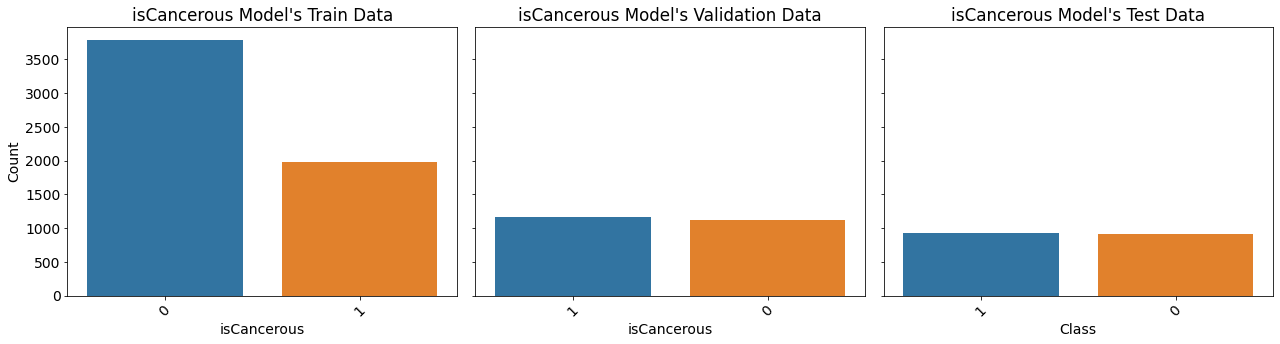

In [15]:
# Data splitting - train-validation-test splits by patientID
print("\nisCancerous Base Model - Logistic Regression: Data Splitting into Train, Validation and Test set (by patientID):")

# Get unique patient IDs
isCancerous_unique_patients = isCancerous_logistic_mainColonCellFrame['patientID'].unique()

# Split patient IDs into train+val (80%) and test (20%)
isCancerous_train_patients, isCancerous_test_patients = train_test_split(isCancerous_unique_patients, test_size=0.2, random_state=42)

# Further split train+val into train (60% of total) and validation (20% of total)
isCancerous_train_patients, isCancerous_val_patients = train_test_split(isCancerous_train_patients, test_size=0.25, random_state=42)

# Create datasets based on patient assignment
with pd.option_context('mode.chained_assignment', None):
    # Assign samples to datasets based on which set their patient ID belongs to
    isCancerous_logisitic_regression_train_data = isCancerous_logistic_mainColonCellFrame[isCancerous_logistic_mainColonCellFrame['patientID'].isin(isCancerous_train_patients)]
    isCancerous_logisitic_regression_val_data = isCancerous_logistic_mainColonCellFrame[isCancerous_logistic_mainColonCellFrame['patientID'].isin(isCancerous_val_patients)]
    isCancerous_logisitic_regression_test_data = isCancerous_logistic_mainColonCellFrame[isCancerous_logistic_mainColonCellFrame['patientID'].isin(isCancerous_test_patients)]

print(f"Training data: {len(isCancerous_logisitic_regression_train_data)} samples from {len(isCancerous_train_patients)} patients")
print(f"Validation data: {len(isCancerous_logisitic_regression_val_data)} samples from {len(isCancerous_val_patients)} patients")
print(f"Test data: {len(isCancerous_logisitic_regression_test_data)} samples from {len(isCancerous_test_patients)} patients")

print("\nisCanceours Model: Class Distribution for Train, Validation and Test set:")
# Set up figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Class distribution for Training Data
sns.countplot(data=isCancerous_logisitic_regression_train_data, x='isCancerous', order=isCancerous_logisitic_regression_train_data['isCancerous'].value_counts().index, ax=axes[0])
axes[0].set_title('isCancerous Model\'s Train Data')
axes[0].set_xlabel('isCancerous')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
 
# Class distribution for Validation Data
sns.countplot(data=isCancerous_logisitic_regression_val_data, x='isCancerous', order=isCancerous_logisitic_regression_val_data['isCancerous'].value_counts().index, ax=axes[1])
axes[1].set_title('isCancerous Model\'s Validation Data')
axes[1].set_xlabel('isCancerous')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)
 
# Class distribution for Test Data
sns.countplot(data=isCancerous_logisitic_regression_test_data, x='isCancerous', order=isCancerous_logisitic_regression_test_data['isCancerous'].value_counts().index, ax=axes[2])
axes[2].set_title('isCancerous Model\'s Test Data')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=45)
 
plt.tight_layout()
plt.show()

#### isCancerous Model's Class Distribution for Train, Validation and Test set
Reason:
- Shows class distribution of isCancerous cell in train, validation, and test sets

Observations:
- Train dataset contain class imbalance and that proper evaluation metrics should be chose for non-bias model training and evaluation
- test and validation dataset does not have the same amount of sample but has balanced class distirbution
- Confirm 60/20/20 split is used with train set has approx 6000 cells, and both validation and test sets have approx 2000 cells each.

## Performance Metrics Selection

### Performance Metrics Selection for all isCancerous Calssificiation Models

We use the following to evaluate all isCancerous models because of isCanceorus class imbalance:
- Macro Average Precision:
    - Measure how many predicted cancerous cases are actually cancerous while giving both classes an equal weight because of class imbalance.
- Macro Average Recall:
    - Measure model performance in identifying actual cancerous cases by calculate recall for each class separately before avergaing to ensure these cases are not missed due to class imbalanced.
- Macro Average F1-score:
    - Measure model's performance by taking account precision (False Positive) and recall (False Negative) while giving both classes an equal weight using macro average.
- Confusion matirx:
    - Illsurate counts for correct and incorrect cancerous and non-cancerous predictions
    - True Positive: actual Cancerous (1), predicted Cancerous (1)
    - False Positive: actual non-Cancerous (0), predicted Cancerous (1)
    - True Negative: actual non-Cancerous (0), predicted non-Cancerous (0)
    - False Negative: actual Cancerous (1), predicted non-Cancerous (0) - This is a concern
- ROC curve:
    - Evaluate performance using true and false positive rates at thresholds to select optimal point for identifying cancerous cell
    - Robust to isCancerous class imbalance
    - allow us to select Model with higher area under the ROC curve (AUC) because it performs better
- Accuracy is not used because:
    - isCancerous class imbalanced allow models achieve exteremly high accuracy by predicting non-Cancerous (majority) on all samples, and missing on actual Cancerous sample.
    - Accuracy weigh errors equally without taking class significane because False negatives (missed Cancerous samples) is a serious concern

## Baseline development

### Logistic Regression Model for isCancerous

Logisitc regression is chosen as baseline model because it can handle the isCancerous class imbalance by giving balanced class weights, and has simple, optimal linear boundary as a benchmark to compare with sophisticated models

EDA patientID vs instanceID plot shows linear boundary clearly separate the classes. So no polynomial transformation used.

We used the testing data to directly test the trained model without any hyperparameter tunning to get baseline performance for comparison with sophicated models.


isCancerous Base Logistic Regression Model Training Data:
isCancerous Base Logistic Regression Model Training Macro Average Precision score: 0.668
isCancerous Base Logistic Regression Model Training Macro Average Recall score: 0.670
isCancerous Base Logistic Regression Model Training Macro Average F1-Score score: 0.669


<Figure size 720x576 with 0 Axes>

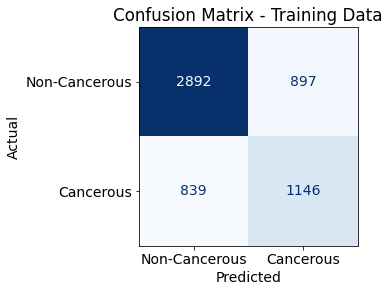

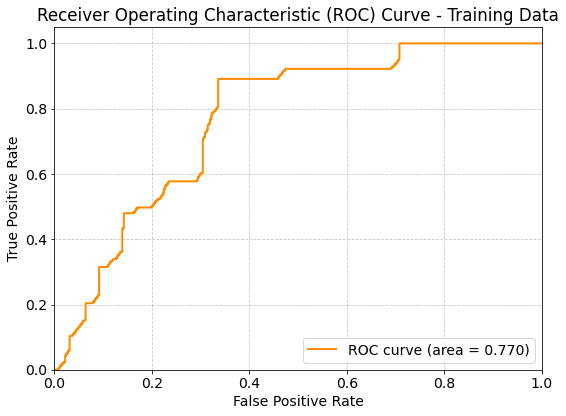


isCancerous Base Logistic Regression Model Testing Data:
isCancerous Base Logistic Regression Model Testing Macro Average Precision: 0.667
isCancerous Base Logistic Regression Model Testing Macro Average Recall: 0.652
isCancerous Base Logistic Regression Model Testing Macro Average F1-Score: 0.644


<Figure size 720x576 with 0 Axes>

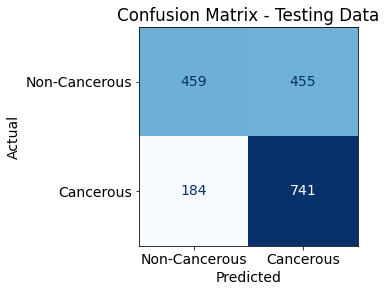

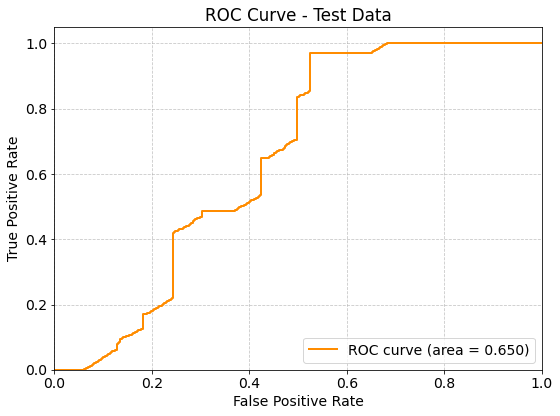

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# convert data to numpy
isCancerous_base_logisitic_regression_train_X = isCancerous_logisitic_regression_train_data.drop(['isCancerous',], axis=1).to_numpy()
isCancerous_base_logisitic_regression_train_y = isCancerous_logisitic_regression_train_data[['isCancerous']].to_numpy()

isCancerous_base_logisitic_regression_test_X = isCancerous_logisitic_regression_test_data.drop(['isCancerous',], axis=1).to_numpy()
isCancerous_base_logisitic_regression_test_y = isCancerous_logisitic_regression_test_data[['isCancerous']].to_numpy()

# train model
isCancerous_base_logisitic_regression_clf = LogisticRegression(random_state=0, penalty='none', solver='saga',
                         max_iter=1000,
                         class_weight='balanced').fit(isCancerous_base_logisitic_regression_train_X, isCancerous_base_logisitic_regression_train_y.ravel())

# trained model make predictions
isCancerous_base_logisitic_regression_train_pred = isCancerous_base_logisitic_regression_clf.predict(isCancerous_base_logisitic_regression_train_X)

# Evaluation Metrics for Training Data
print("\nisCancerous Base Logistic Regression Model Training Data:")
isCancerous_base_logisitic_regression_train_precision = precision_score(
    isCancerous_base_logisitic_regression_train_y, 
    isCancerous_base_logisitic_regression_train_pred, 
    average='macro'
)

isCancerous_base_logisitic_regression_train_recall = recall_score(
    isCancerous_base_logisitic_regression_train_y, 
    isCancerous_base_logisitic_regression_train_pred, 
    average='macro'
)

isCancerous_base_logisitic_regression_train_f1 = f1_score(
    isCancerous_base_logisitic_regression_train_y, 
    isCancerous_base_logisitic_regression_train_pred, 
    average='macro'
)

print("isCancerous Base Logistic Regression Model Training Macro Average Precision score: {:.3f}".format(isCancerous_base_logisitic_regression_train_precision))
print("isCancerous Base Logistic Regression Model Training Macro Average Recall score: {:.3f}".format(isCancerous_base_logisitic_regression_train_recall))
print("isCancerous Base Logistic Regression Model Training Macro Average F1-Score score: {:.3f}".format(isCancerous_base_logisitic_regression_train_f1))

# Generate and plot confusion matrix
isCancerous_base_logisitic_regression_train_cm = confusion_matrix(
    isCancerous_base_logisitic_regression_train_y, 
    isCancerous_base_logisitic_regression_train_pred
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_base_logisitic_regression_train_cm, 
                              display_labels=['Non-Cancerous', 'Cancerous']) 

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Training Data')
plt.show()

# Generate ROC curve and calculate AUC
# Get probability estimates instead of class predictions
isCancerous_base_logisitic_regression_train_proba = isCancerous_base_logisitic_regression_clf.predict_proba(
    isCancerous_base_logisitic_regression_train_X
)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(
    isCancerous_base_logisitic_regression_train_y, 
    isCancerous_base_logisitic_regression_train_proba
)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Evaluation Metrics for Testing Data
print("\nisCancerous Base Logistic Regression Model Testing Data:")
isCancerous_base_logisitic_regression_test_pred = isCancerous_base_logisitic_regression_clf.predict(
    isCancerous_base_logisitic_regression_test_X
)

isCancerous_base_logisitic_regression_test_f1 = f1_score(
    isCancerous_base_logisitic_regression_test_y, 
    isCancerous_base_logisitic_regression_test_pred, 
    average='macro'
)

isCancerous_base_logisitic_regression_test_precision = precision_score(
    isCancerous_base_logisitic_regression_test_y, 
    isCancerous_base_logisitic_regression_test_pred, 
    average='macro'
)

isCancerous_base_logisitic_regression_test_recall = recall_score(
    isCancerous_base_logisitic_regression_test_y, 
    isCancerous_base_logisitic_regression_test_pred, 
    average='macro'
)

print("isCancerous Base Logistic Regression Model Testing Macro Average Precision: {:.3f}".format(isCancerous_base_logisitic_regression_test_precision))
print("isCancerous Base Logistic Regression Model Testing Macro Average Recall: {:.3f}".format(isCancerous_base_logisitic_regression_test_recall))
print("isCancerous Base Logistic Regression Model Testing Macro Average F1-Score: {:.3f}".format(isCancerous_base_logisitic_regression_test_f1))

# Test confusion matrix
isCancerous_base_logisitic_regression_test_cm = confusion_matrix(
    isCancerous_base_logisitic_regression_test_y, 
    isCancerous_base_logisitic_regression_test_pred
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_base_logisitic_regression_test_cm, 
                              display_labels=['Non-Cancerous', 'Cancerous']) 

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Testing Data')
plt.show()

# Test ROC curve
isCancerous_base_logisitic_regression_test_proba = isCancerous_base_logisitic_regression_clf.predict_proba(
    isCancerous_base_logisitic_regression_test_X
)[:, 1]

fpr_test, tpr_test, thresholds_test = roc_curve(
    isCancerous_base_logisitic_regression_test_y, 
    isCancerous_base_logisitic_regression_test_proba
)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc_test))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Baseline - Explanatory Model Analysis

### Baseline Logistic Regression Model for isCancerous

#### Macro Average Precision, Recall, F1-Score
- Similar performance for F1-score between training (0.669) and testing (0.644) which shown Model has moderate predictive power and is not overfitting and patientID splitting strategy is working effectively to prevent data leakage. 
- Model performed worse on test data with recall of 0.652 (lower than training recall: 0.670) shown model is not generalising well on test data and has error in labeling multiple cancerous cells as non-cancerous

#### Confusion Matrix
- Significantly Different Prediction Patterns in both sets because model tend to predict non-cancerous cells correctly in training data, but model has better performance on predict cancerous cells in testing data. Suggest potential distribution differences b|etween training and test patients.
- High false positive frequency in testing data at almost 50% with 455 out of 914 non-cancerous cells are incorrectly classified as cancerous. Much higher rate than in trainig data (23.7% - 897 out of 3789). Suggest model is problematic in real-word usages where high false positives lead to more unnecessary treatments.

#### ROC Curve
- Training data has moderately good AUC (0.770), better than testing data (0.650). Confirm model inability in generalizing to unseen patients. Suggest model learning patterns specific to patients in the training set rather than universal indicators of cancer status
- Training curve shows a more gradual, smoother progression than test curve, which has more abrupt jumps, especially at the 0.5 false positive rate. Indicates probability calibration of the model doesn't transfer well to unseen patients

## Advanced development

### Regularised Logistic Regression Model with Feature Selection for isCancerous

We improved Logisitc regression by applying:
- Feature selection: removing InstanceID and patientID because they are sample and patient identifier which have no predicitve value
- L2 regularisation: select best lambda value from given range using grid search to make sure model is not overfit
- Validation set: hyperparameter tunning on lambda value to select best lambda to prevent overfitting

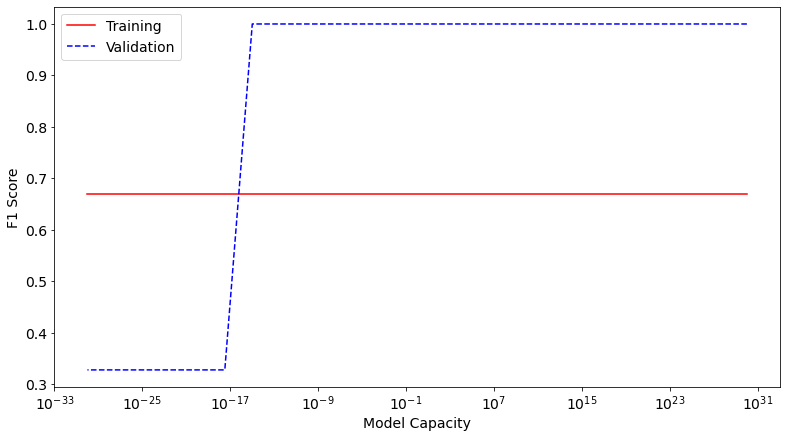

In [17]:
# remove 'InstanceID' and 'patientID' in train, val and test dataset
isCancerous_advanced_logistic_regression_train_X = isCancerous_logisitic_regression_train_data.drop(['isCancerous', 'InstanceID', 'patientID'], axis=1).to_numpy()

isCancerous_advanced_logistic_regression_train_y = isCancerous_logisitic_regression_train_data[['isCancerous']].to_numpy()

isCancerous_advanced_logistic_regression_val_X = isCancerous_logisitic_regression_val_data.drop(['isCancerous', 'InstanceID', 'patientID'], axis=1).to_numpy()
isCancerous_advanced_logistic_regression_val_y = isCancerous_logisitic_regression_val_data[['isCancerous']].to_numpy()

isCancerous_advanced_logistic_regression_test_X = isCancerous_logisitic_regression_test_data.drop(['isCancerous', 'InstanceID', 'patientID'], axis=1).to_numpy()
isCancerous_advanced_logistic_regression_test_y = isCancerous_logisitic_regression_test_data[['isCancerous']].to_numpy()

# Apply grid search for out L2 regularisation
isCancerous_advanced_logistic_regression_lambda_paras = np.logspace(-30, 30, num=25)    # establish the lambda values to test (grid)

# Then search
isCancerous_advanced_logistic_regression_train_performace = list()
isCancerous_advanced_logistic_regression_valid_performace = list()

for lambda_para in isCancerous_advanced_logistic_regression_lambda_paras:
    # train model
    isCancerous_advanced_logistic_regression_clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para,
                             random_state=0, solver='liblinear', max_iter=1000 ,
                             class_weight='balanced').fit(isCancerous_advanced_logistic_regression_train_X, isCancerous_advanced_logistic_regression_train_y.ravel())
    
    # model predict
    isCancerous_advanced_logistic_regression_train_pred = isCancerous_advanced_logistic_regression_clf.predict(isCancerous_advanced_logistic_regression_train_X)
    
    isCancerous_advanced_logistic_regression_val_pred = isCancerous_advanced_logistic_regression_clf.predict(isCancerous_advanced_logistic_regression_val_X)


    # get f1 score
    isCancerous_advanced_logisitic_regression_train_f1 = f1_score(
                                                                isCancerous_base_logisitic_regression_train_y, 
                                                                isCancerous_base_logisitic_regression_train_pred, 
                                                                average='macro'
                                                            )
    
    isCancerous_advanced_logisitic_regression_val_f1 = f1_score(
                                                                isCancerous_advanced_logistic_regression_val_y, 
                                                                isCancerous_advanced_logistic_regression_val_pred, 
                                                                average='macro'
                                                            )

    # append to list
    isCancerous_advanced_logistic_regression_train_performace.append(isCancerous_advanced_logisitic_regression_train_f1)
    isCancerous_advanced_logistic_regression_valid_performace.append(isCancerous_advanced_logisitic_regression_val_f1)

plt.figure(figsize=(13,7))
plt.plot([1.0/lambda_para for lambda_para in isCancerous_advanced_logistic_regression_lambda_paras],
         [tp for tp in isCancerous_advanced_logistic_regression_train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in isCancerous_advanced_logistic_regression_lambda_paras],
         [vp for vp in isCancerous_advanced_logistic_regression_valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

Observation:
- Based on Capacity vs F1 Score plot, choose C ≈ 10^-15 because the validation performance jumps from 0.33 to 1.0 which is a clear transition point. using Ockham’s Razor principle, this C value can train the simplest model with highest regularisation and lowest C value, and that higher C value doesn't improve performance.
- perfect F1-score of 1.0 confirms that the one-hot encoded cellType and isCancerous have a perfect predictive relationship.


isCancerous Advanced Logistic Regression Model Training Data:
isCancerous Advanced Logistic Regression Model Training Macro Average Precision score: 1.000
isCancerous Advanced Logistic Regression Model Training Macro Average Recall score: 1.000
isCancerous Advanced Logistic Regression Model Training Macro Average F1-Score score: 1.000


<Figure size 720x576 with 0 Axes>

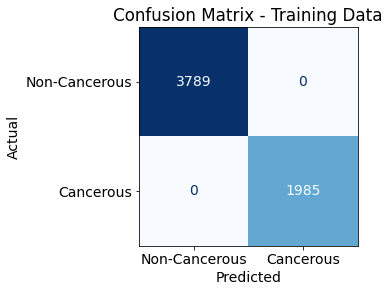

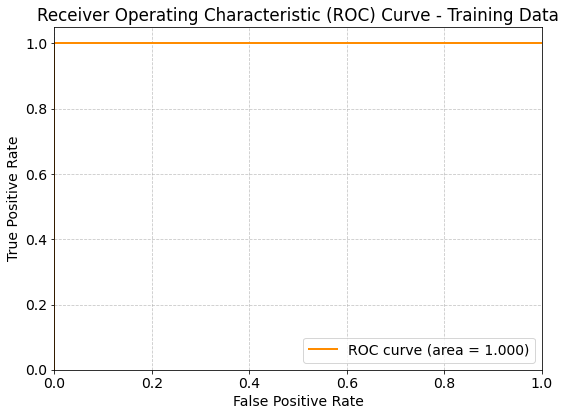


isCancerous Advanced Logistic Regression Model Validation Data:
isCancerous Advanced Logistic Regression Model Validation Macro Average Precision score: 1.000
isCancerous Advanced Logistic Regression Model Validation Macro Average Recall score: 1.000
isCancerous Advanced Logistic Regression Model Validation Macro Average F1-Score score: 1.000


<Figure size 720x576 with 0 Axes>

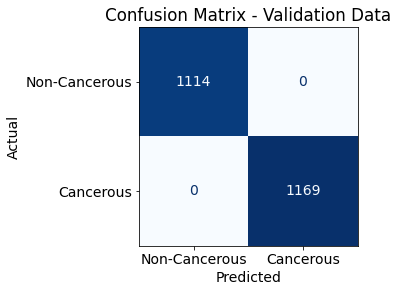

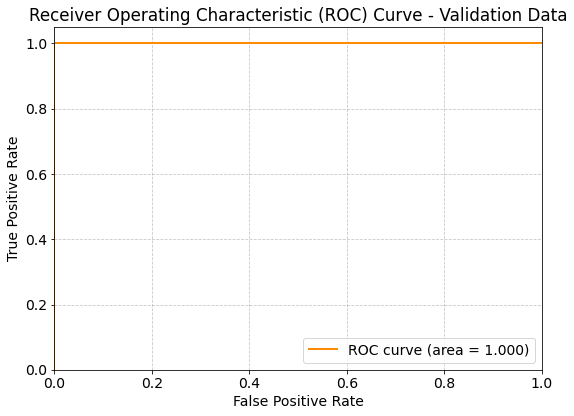


isCancerous Advanced Logistic Regression Model Tetsing Data:
isCancerous Advanced Logistic Regression Model Testing Macro Average Precision score: 1.000
isCancerous Advanced Logistic Regression Model Testing Macro Average Recall score: 1.000
isCancerous Advanced Logistic Regression Model Testing Macro Average F1-Score score: 1.000


<Figure size 720x576 with 0 Axes>

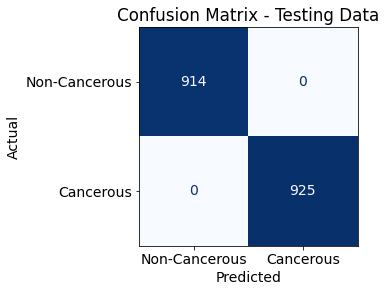

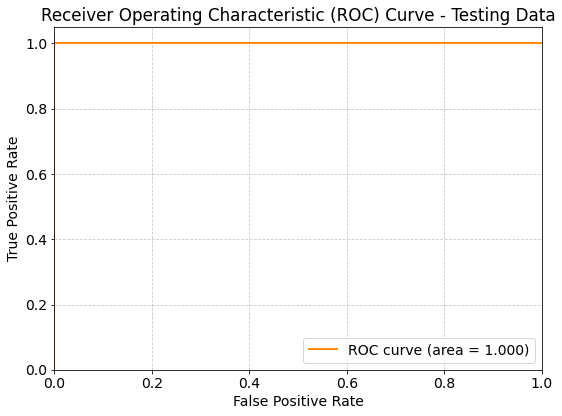

In [18]:
# Use C = 10^-15 to train model
isCancerous_advanced_logistic_regression_clf_with_selected_c = LogisticRegression(
    penalty='l2', 
    C = 1e-15,  # 10^-15
    random_state=0,
    solver='liblinear', 
    max_iter=1000,
    class_weight='balanced'
    ).fit(isCancerous_advanced_logistic_regression_train_X, 
          isCancerous_advanced_logistic_regression_train_y.ravel())

# model predict
isCancerous_advanced_logistic_regression_train_pred = isCancerous_advanced_logistic_regression_clf_with_selected_c.predict(isCancerous_advanced_logistic_regression_train_X)

# Evaluation Metrics for Training Data
print("\nisCancerous Advanced Logistic Regression Model Training Data:")
isCancerous_advanced_logistic_regression_train_precision = precision_score(
    isCancerous_advanced_logistic_regression_train_y, 
    isCancerous_advanced_logistic_regression_train_pred, 
    average='macro'
)

isCancerous_advanced_logistic_regression_train_recall = recall_score(
    isCancerous_advanced_logistic_regression_train_y, 
    isCancerous_advanced_logistic_regression_train_pred, 
    average='macro'
)

isCancerous_advanced_logistic_regression_train_f1 = f1_score(
    isCancerous_advanced_logistic_regression_train_y, 
    isCancerous_advanced_logistic_regression_train_pred, 
    average='macro'
)

print("isCancerous Advanced Logistic Regression Model Training Macro Average Precision score: {:.3f}".format(isCancerous_advanced_logistic_regression_train_precision))
print("isCancerous Advanced Logistic Regression Model Training Macro Average Recall score: {:.3f}".format(isCancerous_advanced_logistic_regression_train_recall))
print("isCancerous Advanced Logistic Regression Model Training Macro Average F1-Score score: {:.3f}".format(isCancerous_advanced_logistic_regression_train_f1))

# Generate and plot confusion matrix
isCancerous_advanced_logistic_regression_train_cm = confusion_matrix(
    isCancerous_advanced_logistic_regression_train_y, 
    isCancerous_advanced_logistic_regression_train_pred
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_advanced_logistic_regression_train_cm, 
                              display_labels=['Non-Cancerous', 'Cancerous']) 

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Training Data')
plt.show()

# Generate ROC curve and calculate AUC
# Get probability estimates instead of class predictions
isCancerous_advanced_logistic_regression_train_proba = isCancerous_advanced_logistic_regression_clf_with_selected_c.predict_proba(
    isCancerous_advanced_logistic_regression_train_X
)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(
    isCancerous_advanced_logistic_regression_train_y, 
    isCancerous_advanced_logistic_regression_train_proba
)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# model predict
isCancerous_advanced_logistic_regression_val_pred = isCancerous_advanced_logistic_regression_clf_with_selected_c.predict(isCancerous_advanced_logistic_regression_val_X)

# Evaluation Metrics for Validation Data
print("\nisCancerous Advanced Logistic Regression Model Validation Data:")
isCancerous_advanced_logistic_regression_val_precision = precision_score(
    isCancerous_advanced_logistic_regression_val_y, 
    isCancerous_advanced_logistic_regression_val_pred, 
    average='macro'
)

isCancerous_advanced_logistic_regression_val_recall = recall_score(
    isCancerous_advanced_logistic_regression_val_y, 
    isCancerous_advanced_logistic_regression_val_pred, 
    average='macro'
)

isCancerous_advanced_logistic_regression_val_f1 = f1_score(
    isCancerous_advanced_logistic_regression_val_y, 
    isCancerous_advanced_logistic_regression_val_pred, 
    average='macro'
)


print("isCancerous Advanced Logistic Regression Model Validation Macro Average Precision score: {:.3f}".format(isCancerous_advanced_logistic_regression_val_precision))
print("isCancerous Advanced Logistic Regression Model Validation Macro Average Recall score: {:.3f}".format(isCancerous_advanced_logistic_regression_val_recall))
print("isCancerous Advanced Logistic Regression Model Validation Macro Average F1-Score score: {:.3f}".format(isCancerous_advanced_logistic_regression_val_f1))

# Generate and plot confusion matrix
isCancerous_advanced_logistic_regression_val_cm = confusion_matrix(
    isCancerous_advanced_logistic_regression_val_y, 
    isCancerous_advanced_logistic_regression_val_pred
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_advanced_logistic_regression_val_cm, 
                              display_labels=['Non-Cancerous', 'Cancerous']) 

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Validation Data')
plt.show()

# Generate ROC curve and calculate AUC
# Get probability estimates instead of class predictions
isCancerous_advanced_logistic_regression_val_proba = isCancerous_advanced_logistic_regression_clf_with_selected_c.predict_proba(
    isCancerous_advanced_logistic_regression_val_X
)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(
    isCancerous_advanced_logistic_regression_val_y, 
    isCancerous_advanced_logistic_regression_val_proba
)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Data')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# model predict
isCancerous_advanced_logistic_regression_test_pred = isCancerous_advanced_logistic_regression_clf_with_selected_c.predict(isCancerous_advanced_logistic_regression_test_X)

# Evaluation Metrics for Testing Data
print("\nisCancerous Advanced Logistic Regression Model Tetsing Data:")
isCancerous_advanced_logistic_regression_test_precision = precision_score(
    isCancerous_advanced_logistic_regression_test_y, 
    isCancerous_advanced_logistic_regression_test_pred, 
    average='macro'
)

isCancerous_advanced_logistic_regression_test_recall = recall_score(
    isCancerous_advanced_logistic_regression_test_y, 
    isCancerous_advanced_logistic_regression_test_pred, 
    average='macro'
)

isCancerous_advanced_logistic_regression_test_f1 = f1_score(
    isCancerous_advanced_logistic_regression_test_y, 
    isCancerous_advanced_logistic_regression_test_pred, 
    average='macro'
)


print("isCancerous Advanced Logistic Regression Model Testing Macro Average Precision score: {:.3f}".format(isCancerous_advanced_logistic_regression_test_precision))
print("isCancerous Advanced Logistic Regression Model Testing Macro Average Recall score: {:.3f}".format(isCancerous_advanced_logistic_regression_test_recall))
print("isCancerous Advanced Logistic Regression Model Testing Macro Average F1-Score score: {:.3f}".format(isCancerous_advanced_logistic_regression_test_f1))

# Generate and plot confusion matrix
isCancerous_advanced_logistic_regression_test_cm = confusion_matrix(
    isCancerous_advanced_logistic_regression_test_y,
    isCancerous_advanced_logistic_regression_test_pred
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_advanced_logistic_regression_test_cm, 
                              display_labels=['Non-Cancerous', 'Cancerous']) 

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Testing Data')
plt.show()

# Generate ROC curve and calculate AUC
# Get probability estimates instead of class predictions
isCancerous_advanced_logistic_regression_test_proba = isCancerous_advanced_logistic_regression_clf_with_selected_c.predict_proba(
    isCancerous_advanced_logistic_regression_test_X
)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(
    isCancerous_advanced_logistic_regression_test_y, 
    isCancerous_advanced_logistic_regression_test_proba
)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Testing Data')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Advanced - Explanatory Model Analysis

### Regularised Logistic Regression Model with Feature Selection for isCancerous

#### Macro Average Precision, Recall, F1-Score
Base Logistic Regression Model
- Training Data:
    - Macro Average Precision score: 0.668
    - Macro Average Recall score: 0.670
    - Macro Average F1-Score score: 0.669
- Testing Data:
    - Macro Average Precision score: 0.667
    - Macro Average Recall: 0.652
    - Macro Average F1-Score: 0.644

Advanced Logistic Regression Model
- Training Data:
    - Macro Average Precision score: 1.000
    - Macro Average Recall score: 1.000
    - Macro Average F1-Score score: 1.000
- Validation Data:
    - Macro Average Precision score: 1.000
    - Macro Average Recall: 1.000
    - Macro Average F1-Score: 1.000
- Testing Data:
    - Macro Average Precision score: 1.000
    - Macro Average Recall: 1.000
    - Macro Average F1-Score: 1.000

Observations:
- Advanced model's perfect performance (1.000) in all Precision, recal, and F1-score, is a significant improvement from base model, because removing identifier variable (patientID and InstanceID) allowed the model to focus  on predictive feature (cellType). base model poor performance is because of noise from these identifiers which have no relationship to isCancerous.
- Advanced model's perfect performance suggest removing identifier variable has bigger impact than regularization tuning because regularization aims to improve generalisation but the perfect isCancerous separation using cellType means that once the noise was removed, simple linear model can classify perfectly without complex regularization.

#### Confusion Matrix
- Advanced model significantly improved because it predict all cancerous and non-cancerous cell correctly based on cellType for all dataset. No false negative present which means classifcation model always make sure cancerous cell are 100% classify as cancerous.

#### ROC Curve
- Advanced model's has imporved because of perfect AUC (1.000) for all datasets, higher than base model training AUC (0.770) and testing AUC (0.650). This confirm the model always classify correctly by using only cellType, rather than using patientID and instanceID.